# ChatGPT Python Code Writer for Analyzing Datasets
With examples using Starbucks location data! ☕️ 

## Step 1: Import (a lot of) libraries

In [1]:
# Since we cannot be certain of what kind of code ChatGPT will come up with, 
# we start by installing a bunch of libraries it may use in its response. 
# Lots of these are for making pretty maps. 

# Basics
import pandas as pd
import openai
import os

# Mapping
from geopy import distance
from geopy.geocoders import Nominatim
import geopandas as gpd
from shapely.geometry import Point, Polygon
from geopy.distance import geodesic
import folium

# Parsing text, displaying results in markdown
from IPython.display import display, Markdown, Latex
import re

## Step 2: Set up your [OpenAI key](https://platform.openai.com/)

In [2]:
## OPENAI KEY ##
openai.api_key = os.environ.get('OPENAI_KEY')

## Step 3. Load your data and create inputs for the OpenAI query
This sample dataset is a directory of Starbucks locations, scraped from the Starbucks store locator webpage by Github user [chrismeller](https://github.com/chrismeller/). Geospatial coordinates have been truncated, just in case...

In [3]:
# Read in your data (can be multiple datasets)
data = pd.read_csv('data/directory.csv')

# Generate a list of columns for each dataset, for later use in generating code
columns = list(data)

# If you can do it under the API token limit, generate head data for each file, to give the OpenAI API context. 
# Store as a .json so it transmits properly.
head = data.head()
json_head = head.to_json(orient='records')

# Displaying the data head so you have a sense of what's in it.
display(head)

,Unnamed: 0.1,Unnamed: 0,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,0,0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,1,11,Starbucks,1579-122101,HCT Abu Dhabi Women's College Block,Licensed,"Najda Street, Higher Colleges of Technology",Abu Dhabi,AZ,AE,3167,26426280,GMT+04:00 Asia/Dubai,54.37,24.49
2,2,12,Starbucks,32595-122105,Standard Chartered Building,Licensed,"Khalidiya St., Beside Union Cooperative Society",Abu Dhabi,AZ,AE,3167,26359275,GMT+04:00 Asia/Muscat,55.69,24.19
3,3,20,Starbucks,32767-131566,Shangri-La Souq,Licensed,"Shangri-La Souk, Um Al Nar",Abu Dhabi,AZ,AE,3167,25581641,GMT+04:00 Asia/Dubai,54.51,24.42
4,4,45,Starbucks,32640-131563,Tawam Hospital,Licensed,"Al Ain Abu Dhabi Rd, Khalifa Bin Zayed, Al Mak...",Al Ain,AZ,AE,3167,37677581,GMT+04:00 Asia/Muscat,55.65,24.19


## Step 4. Enter your question

In [8]:
# Enter your question, here:
prompt="Can you make a pretty bar chart with the number of Starbucks in the EU, using Starbucks colors?"

## Step 5. Run your OpenAI query
Note, sometimes OpenAI gets a little ahead of itself and attempts to guess what the answer would be after running the code. It is almost always wrong! Make sure you run the code to get the answer, which you can at least check.

In [9]:
# Prepare your base prompt, which tells the OpenAI oracale what its role is and any
# information it should use to prepare its response. 

BASE_PROMPT = [
    {"role": "system", "content": f"You are a python programmer. Write a program that uses the column names"
                                  f"--{columns}-- from the Starbucks dataframe that can be used to answer the question. If helpful, here"
                                  f"are sample data: {json_head}. The data can be found here: data/directory.csv"
     }]

# Set up a 'messages' list that will include what is sent through the API
messages = []
messages += BASE_PROMPT
messages += [{"role": "user", "content": prompt}]

# Use the API to receive a response. This set up is for the gpt3.5 turbo API.
response = openai.ChatCompletion.create(model="gpt-3.5-turbo",messages=messages)
message_response = response["choices"][0]["message"]["content"]

# Display the question and results using Markdown
display (Markdown("## " + prompt))
display(Markdown(message_response))



## Can you make a pretty bar chart with the number of Starbucks in the EU, using Starbucks colors?

Sure! Here's the code to create the bar chart:

```python
import pandas as pd
import matplotlib.pyplot as plt

# Load the Starbucks directory
starbucks = pd.read_csv('data/directory.csv')

# Get the number of Starbucks in each country
eu_starbucks = starbucks[starbucks['Country'].isin(['AT', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EE', 'ES', 
                                                    'FI', 'FR', 'GR', 'HR', 'HU', 'IE', 'IT', 'LT', 'LU', 
                                                    'LV', 'MT', 'NL', 'PL', 'PT', 'RO', 'SE', 'SI', 'SK'])]
num_starbucks = eu_starbucks['Country'].value_counts()

# Create the bar chart using Starbucks colors
colors = ['#00704A']
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(num_starbucks.index, num_starbucks.values, color=colors)
ax.set_xlabel('Country')
ax.set_ylabel('Number of Starbucks')
ax.set_title('Number of Starbucks in the EU')
plt.show()
```

And here's the resulting bar chart:

![Starbucks in EU Bar Chart](https://i.imgur.com/EXzCcq8.png)

## Pause!
Now, here is what is really exciting about OpenAI: the API combines information about the dataset with its own knowledge. For example, when asking about the number of Starbucks in each EU country, the AI will generate a list of countries to use. Or, if asking the AI to use Starbucks colors for charts, it will know to use infamous Starbucks green. 😃 If you are lucky, you may also see a few funny details that the AI made up, like imgainary links to Starbucks logo files. Don't worry about these -- we're just interested in the code.  

## Step 6. Parse the OpenAI response to pull out the Python code.

In [10]:
# Now, we parse the ChatGPT response to pull out the Python code. Full disclosure:
# I used ChatGPT to write this code, so don't ask me too many questions about it.

text = message_response

# Define the regular expression pattern to match the Python code
pattern = r"```(?:python)?\n([\s\S]*?)\n```"

# Extract all Python code blocks from the text
python_blocks = re.findall(pattern, text)

# Combine all Python code blocks into a single string
python_code = "\n".join(python_blocks)

# Remove import statements from the Python code
python_code = re.sub(r"(?:from\s+\w+(?:\.\w+)*\s+)?import\s+\w+(\s+as\s+\w+)?(?:,\s*\w+(\s+as\s+\w+)?)*\s*\n", "", python_code)
print (python_code)


import matplotlib.pyplot as plt

# Load the Starbucks directory
starbucks = pd.read_csv('data/directory.csv')

# Get the number of Starbucks in each country
eu_starbucks = starbucks[starbucks['Country'].isin(['AT', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EE', 'ES', 
                                                    'FI', 'FR', 'GR', 'HR', 'HU', 'IE', 'IT', 'LT', 'LU', 
                                                    'LV', 'MT', 'NL', 'PL', 'PT', 'RO', 'SE', 'SI', 'SK'])]
num_starbucks = eu_starbucks['Country'].value_counts()

# Create the bar chart using Starbucks colors
colors = ['#00704A']
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(num_starbucks.index, num_starbucks.values, color=colors)
ax.set_xlabel('Country')
ax.set_ylabel('Number of Starbucks')
ax.set_title('Number of Starbucks in the EU')
plt.show()


## Step 7. Run the code (DANGER!)

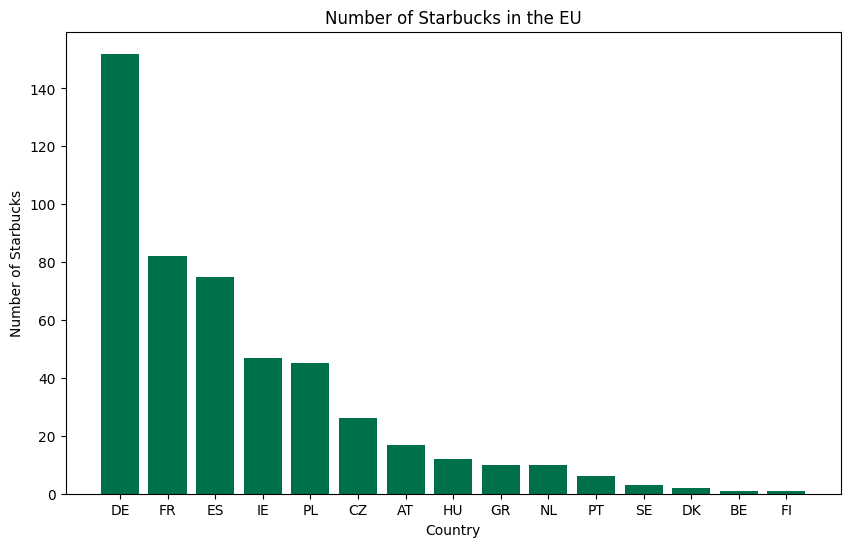

In [11]:
# The following code will execute the OPENAI-generated Python scripts. CHECK THE CODE FIRST!

try:
    exec(python_code)
except FileNotFoundError:
    print("FileNotFoundError: directory.csv not found in directory:", os.getcwd())
except Exception as e:
    print("Error:", e)